In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Create term-test-1-result.csv and term-test-2-result.csv

In [2]:
# Generate random data for 50 students
np.random.seed(42)  # For reproducibility
registration_numbers = [f'REG{i:03d}' for i in range(1, 51)]
names = [f'Student{i}' for i in range(1, 51)]
tt1_marks = np.random.randint(0, 100, size=50)  # Random marks between 0 and 100
tt2_marks = np.random.randint(0, 100, size=50)  # Random marks between 0 and 100

# Create DataFrames
df1 = pd.DataFrame({
    'Registration Number': registration_numbers,
    'Name': names,
    'TT-1 Marks': tt1_marks
})

df2 = pd.DataFrame({
    'Registration Number': registration_numbers,
    'Name': names,
    'TT-2 Marks': tt2_marks
})

# Save to CSV files
df1.to_csv('term-test-1-result.csv', index=False)
df2.to_csv('term-test-2-result.csv', index=False)

Load the CSV files into pandas DataFrames

In [3]:
df1 = pd.read_csv('term-test-1-result.csv')
df2 = pd.read_csv('term-test-2-result.csv')

Merge the DataFrames on Registration Number

In [5]:
df_merged = pd.merge(df1, df2, on=['Registration Number', 'Name'])

Add Best Marks and Average Marks Columns

In [6]:
df_merged['Best Marks'] = df_merged[['TT-1 Marks', 'TT-2 Marks']].max(axis=1)
df_merged['Average Marks'] = df_merged[['TT-1 Marks', 'TT-2 Marks']].mean(axis=1)

Drop TT-1 Marks and TT-2 Marks Columns

In [7]:
df_merged.drop(columns=['TT-1 Marks', 'TT-2 Marks'], inplace=True)

Save the Merged DataFrame to a New CSV File

In [8]:
df_merged.to_csv('final-term-test-result.csv', index=False)

Perform K-Means Clustering on Average Marks

In [10]:
#Feature Selection
X = df_merged[['Average Marks']]

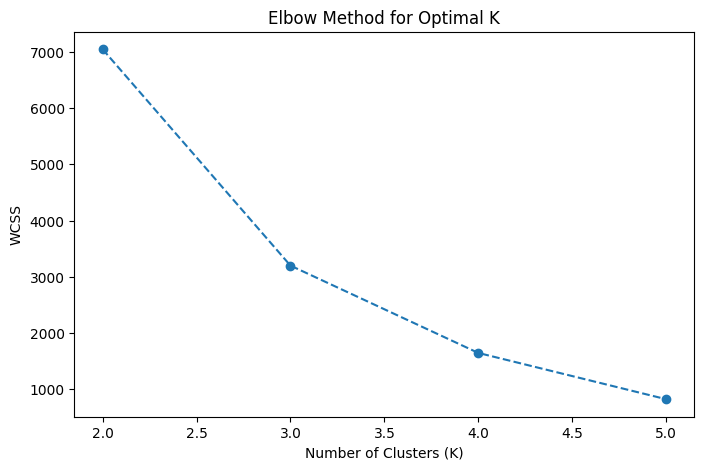

In [12]:
# Determine the Optimal Number of Clusters (Elbow Method)
wcss = []  # Within-cluster sum of squares
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(range(2, 6), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

Perform K-Means Clustering

In [13]:
best_k = 3  # Assume K=3 based on the Elbow Method
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df_merged['Cluster'] = kmeans.fit_predict(X)

Visualize the Clusters

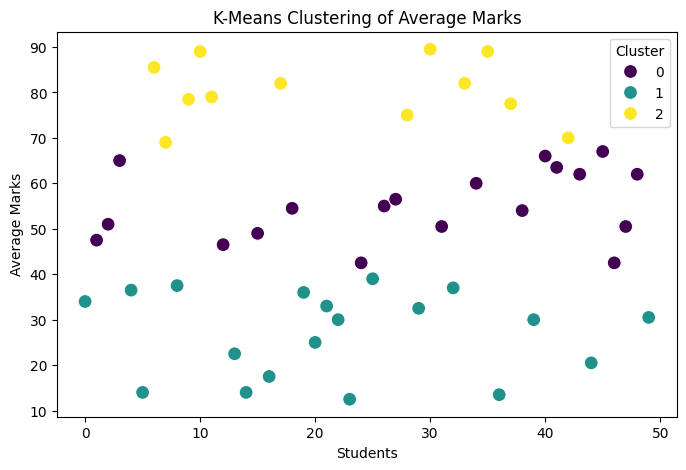

In [14]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_merged.index, y=df_merged['Average Marks'], hue=df_merged['Cluster'], palette='viridis', s=100)
plt.xlabel('Students')
plt.ylabel('Average Marks')
plt.title('K-Means Clustering of Average Marks')
plt.legend(title='Cluster')
plt.show()